<a href="https://colab.research.google.com/github/rajusuthar/Python-Assignment/blob/main/bike_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Defining and Understanding business problem (domain knowledge of business)**

#Rented Bike sharing systems are a means of renting bike where the process of  renting bike and bike return is automated throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on need basis.
#The last couple of years has seen a significant rise in the number of bike share companies popping up across in India also, becuase of :-
* # Rental bike are Cheaper Than Transit or Car Rental
* # cost-effective
* # It Eliminates the Need for Personal Bike Ownership
* #  It’s Healthier Than Driving or Riding Transit

#Because rental bike sharing is growing ,so availibility of bike at the right time is really important for companies to serve customer. In this project i have dataset of Seoul city (capital of South Korea) . The dataset contain information like weather condition,holiday,date,number of rented bike count,hours. Based on these data i have to predict bikes count at each hour for the stable supply of rental bikes.

#This dataset contain around 9 thousand rows of information and each row contain information like weather condition ,holidays or funtioning days ,count of bike required at particular hour on a particular date.
#Using this dataset i have analyze it and also need to creat machine learning model so that i can predict count of bike required at each hour.

#Understanding business problem is really important ,so till now we understand what is the business problem and also what kind of information we have in our dataset and what we have to predict using machine learning model.
#**so let's start_**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#creating directory path
dir_path='/content/drive/MyDrive/bike.csv'

In [ ]:
#reading csv file
Bike_df=pd.read_csv(dir_path)

#let's have a look on dataset

In [ ]:
#let's see dataframe
Bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#Let's first creat a copy of dataframe

In [ ]:
#creating copy of dataframe
Bike_df_copy=Bike_df.copy()

#Statical summary of data

In [ ]:
#statical summary
Bike_df_copy.describe()

,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#From the statical summary we can check mean,maximum,minimum values of each feature

In [ ]:
#printing all columns/feature
Bike_df_copy.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#These are the columns/features contain by our dataframe.each column are containing different type of information like **"Rented Bike Count"** column contain count of bike required at each hour,similarly **"Holiday"** column contain ,on that particular day there was any holiday or not.

In [ ]:
#checking shape of dataframe
Bike_df_copy.shape

(8760, 14)

#Our dataset have around 9 thousand rows and 14 columns

#**Pre-Processing of data**

#Preprocessing of data is important for highest accuracy of our model.before fitting our data to machine learning model ,it's important that data must be cleaned and also without outlier (if this not done then our model will never learn true pattern of data).If any particular model have some assumption then we also need to take care of these assumption before fitting our data to model .
#for example in linear regression we have some assumption like (multicollinearity,homodasticity,normally distribution).

#**Let's start pre-processing of data so that we can get highest accuracy in predictions**

#Before going further it's important to understand about feature of our dataframe and also what type of data each columns contain

#Checking info of dataframe

In [ ]:
#checking info
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(蚓)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(蚓)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

#Most of the feature in our dataframe are numeric type and some are categorical type but "**Date**" column of our dataframe contain datetime type information but in given data set its data type is object so let's convert datatype of "**Date**" column.

#Now let's check for null value/missing value in each column. if there is any null value we will try to replace null value by mean,median or mode.if null value in any  column is greater than fourty percent we will drop that particular column from dataset.Treatment of null value is important because it will make our analysis much stronger

In [ ]:
#checking null values and sorting in descending order
Bike_df_copy.isnull().sum().sort_values(ascending=False)

Functioning Day             0
Holiday                     0
Seasons                     0
Snowfall (cm)               0
Rainfall(mm)                0
Solar Radiation (MJ/m2)     0
Dew point temperature(蚓)    0
Visibility (10m)            0
Wind speed (m/s)            0
Humidity(%)                 0
Temperature(蚓)              0
Hour                        0
Rented Bike Count           0
Date                        0
dtype: int64

#Ohh ,that's great | In our dataset there is no null / missing values

#Till now we checked for null/missing value and also datatype of our dataframe columns,Now let's check for outlier.
#For a particular feature outlier is basically either very less or either very extreme value compared to all other value to that feature.
#Identification of potential outliers is important because ,An outlier may indicate bad data. For example, the data may have been puted incorrectly or an experiment may not have been run correctly.
#**Let's check for the outlier in our data**

#In our dataframe we have some categorical features as well so i am just creating a list of features which are numeric

In [ ]:
#creating list of numeric features
List_of_numeric=['Rented Bike Count','Temperature(蚓)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

#For outlier detection let's creat box plot for all numeric features

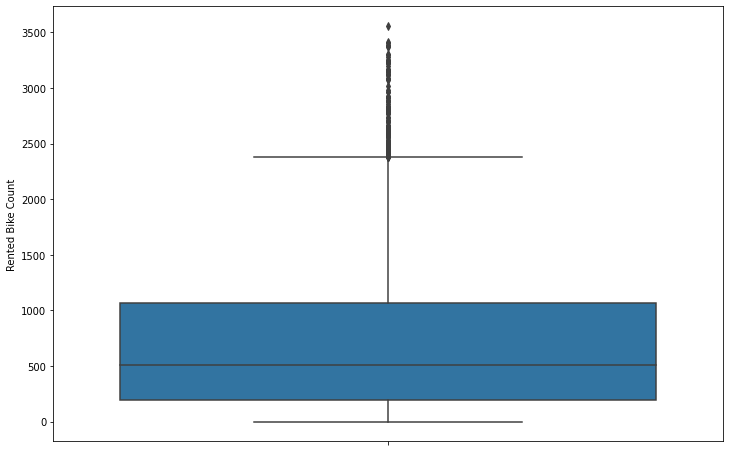

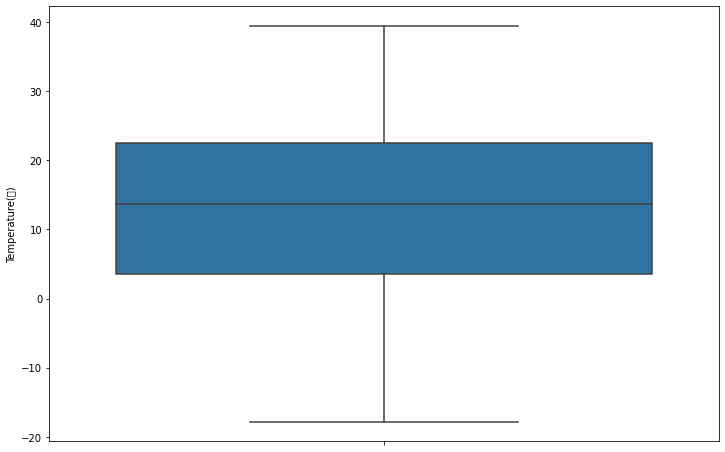

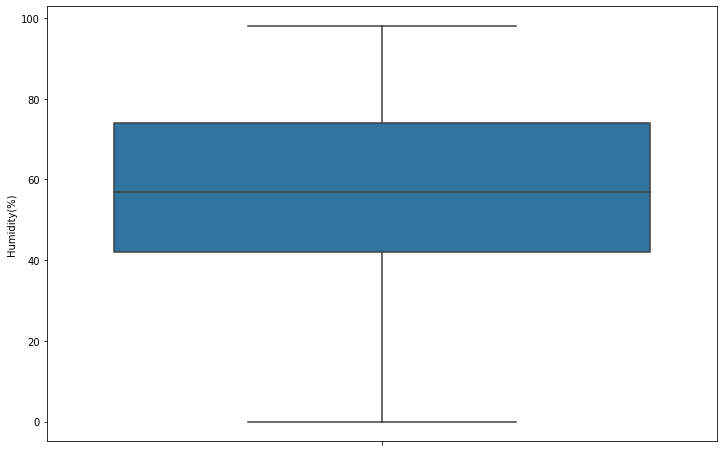

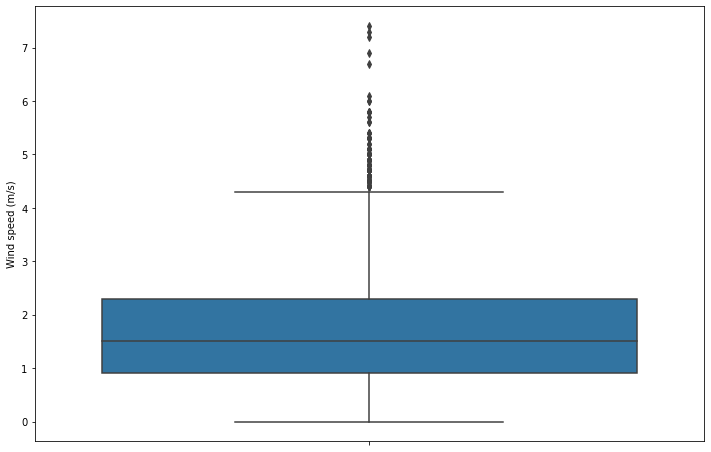

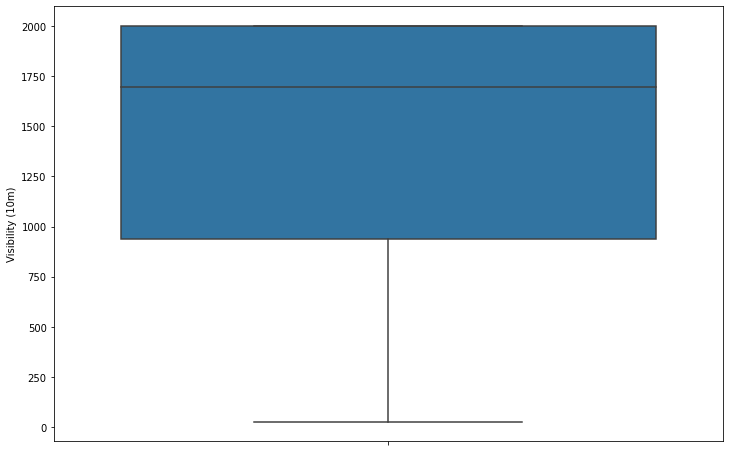

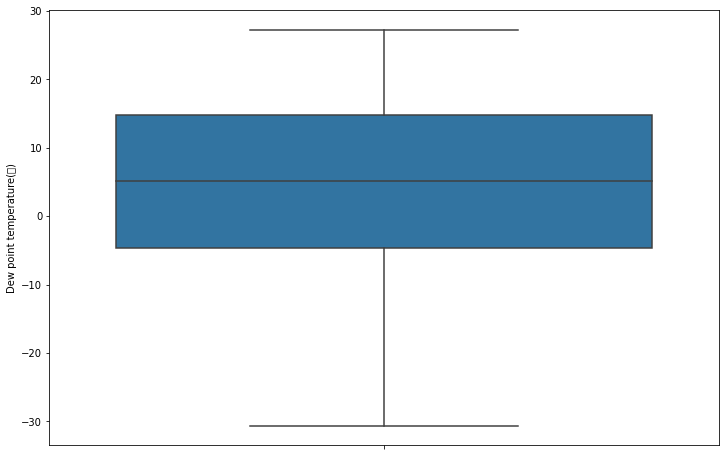

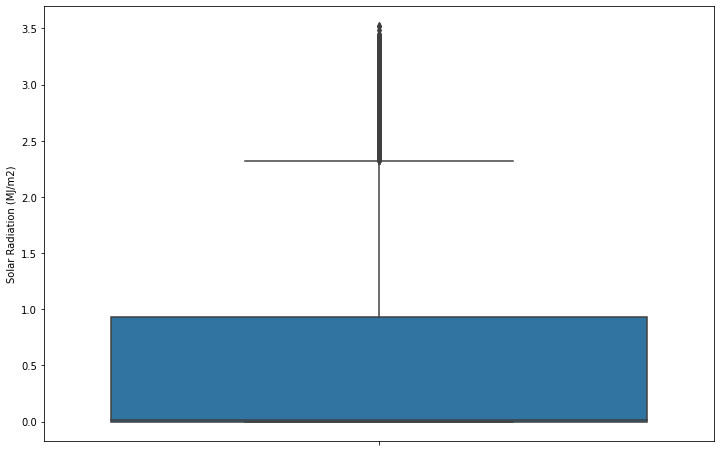

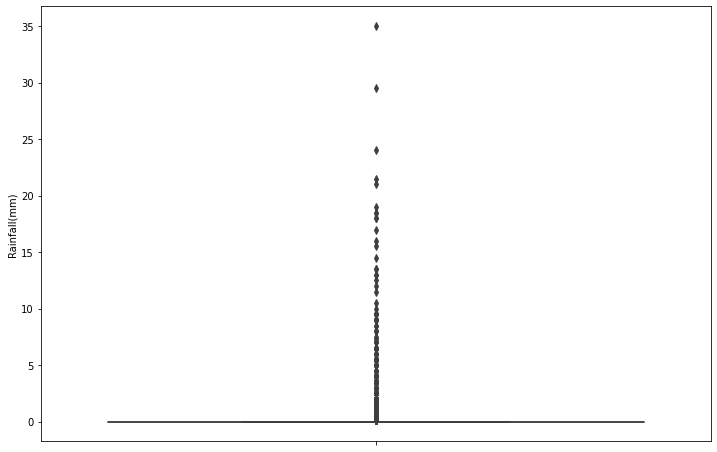

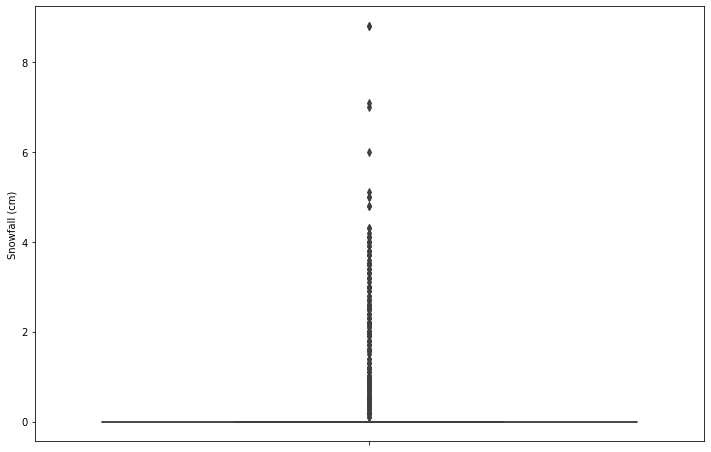

In [ ]:
#creating boxplot for outlier detection
for col in List_of_numeric:
  plt.figure(figsize=(12,8))
  sns.boxplot(y=Bike_df_copy[col])

#As we can see from above box plot that in most of the variable we don't have that much extreme value(outlier), from box plot value above upper whiskers are basically outlier but there count in our dataframe is not much.so i am not removing these value becuase there count is very less and i think these value much not impact our machine learning model as well

In [ ]:
# Finding Q1, Q3 and IQR
Q1 =  Bike_df_copy['Rented Bike Count'].quantile(0.25) #25%
Q3 = Bike_df_copy['Rented Bike Count'].quantile(0.75) # 75%
IQR = Q3 - Q1

In [ ]:
# Remove outliers from our data set
outliers = (Bike_df_copy['Rented Bike Count'] >= Q1 - 1.5 * IQR) & (Bike_df_copy['Rented Bike Count'] <= Q3 + 1.5 *IQR)
Bike_df_copy = Bike_df_copy.loc[outliers]

In [ ]:
#importing library
import datetime
import calendar

def findDay(date):
    born = datetime.datetime.strptime(date, '%d/%m/%Y').weekday()
    return (calendar.day_name[born])

In [ ]:
#creating weekdays columns
Bike_df_copy['weekdays']=Bike_df_copy['Date'].apply(findDay)

#In our dataset we have date column ,from this column we can extract year,month and day ,so let's creat three new column in our dataframe

In [ ]:
#converting datatype of "Date" column
Bike_df_copy['Date']=pd.to_datetime(Bike_df_copy['Date'])

In [ ]:
#creating three new column /extracting day,month,year from date column
Bike_df_copy['month'] = Bike_df_copy['Date'].dt.month
Bike_df_copy['year'] = Bike_df_copy['Date'].dt.year
Bike_df_copy['day'] = Bike_df_copy['Date'].dt.day

In [ ]:
#dropping date column
Bike_df_copy.drop('Date',axis=1,inplace=True)

In [ ]:
Bike_df_copy=Bike_df_copy[Bike_df_copy['Rented Bike Count']!=0]

In [ ]:
#checking values count
Bike_df_copy['Rented Bike Count'].value_counts().reset_index().head()

,index,Rented Bike Count
0,223,19
1,122,19
2,262,19
3,165,18
4,103,18


#In our dataframe we have 295 rows where Rented bike count is 0 ,it's possiable becuase of either weather condition or depends on time.

#Till now we worked on data cleaning and outlier detection,Now let's do exploratory data analysis on data so that we can understand some pattern or trend of required bike count in different conditions, these analysis help us to understand how required bike count changes with different-different condition.

#**Exploratory data analysis**



---



#**Distribution of feature**

In [ ]:
#creating list of numeric features
List_of_numerics=['Temperature(蚓)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Seasons','Holiday','Functioning Day']

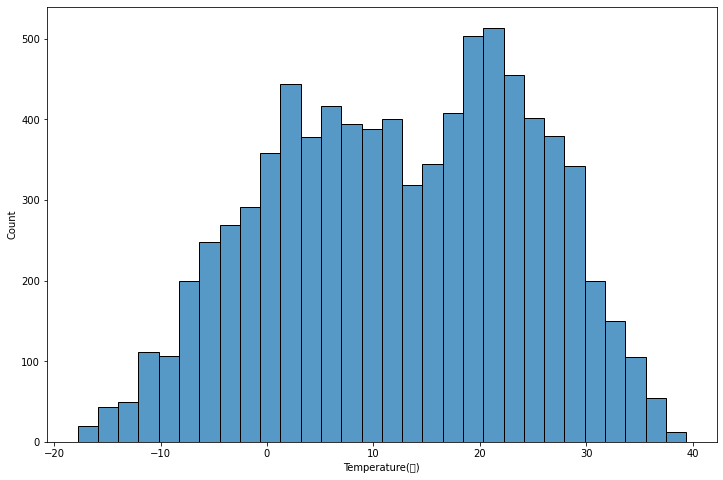

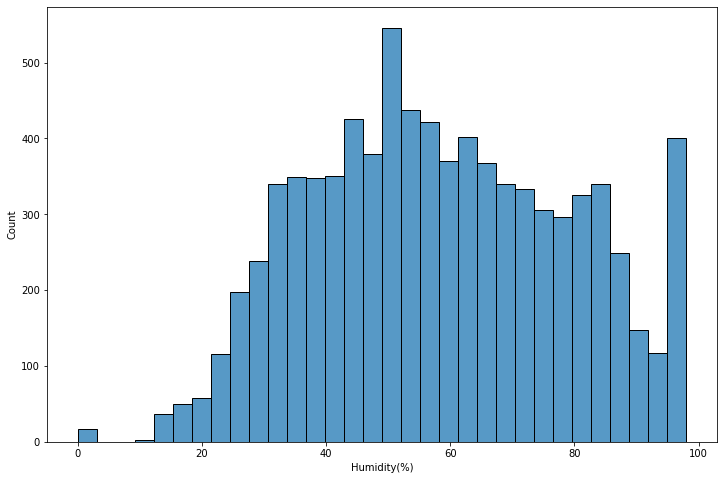

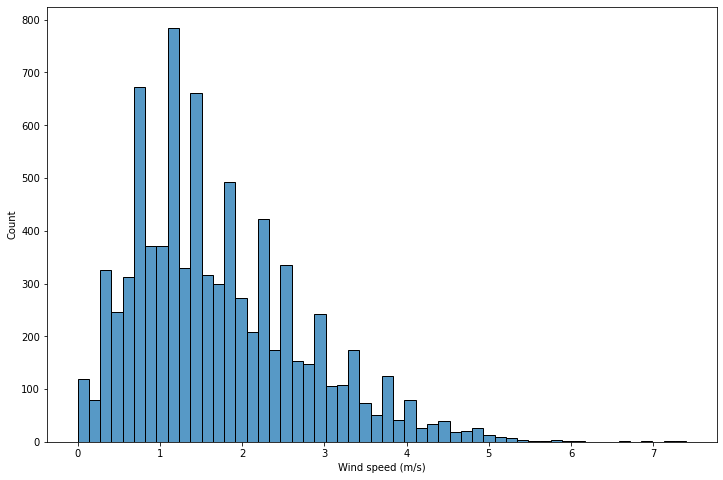

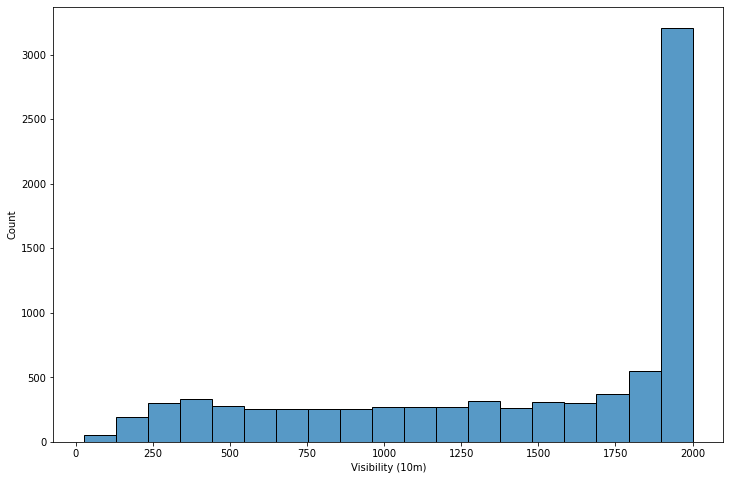

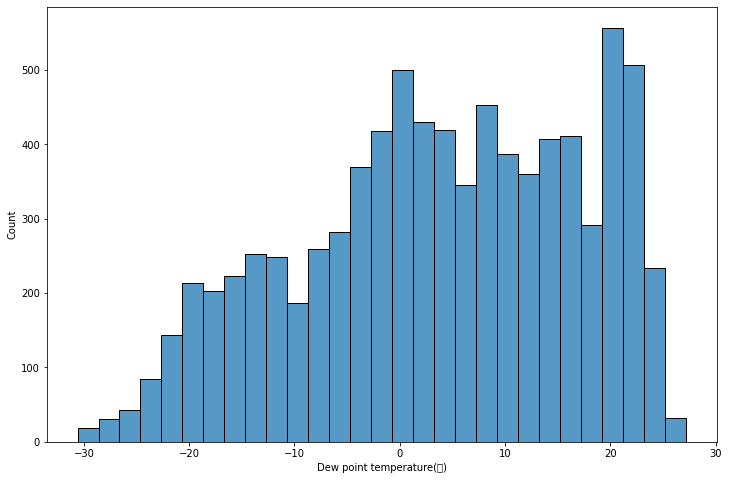

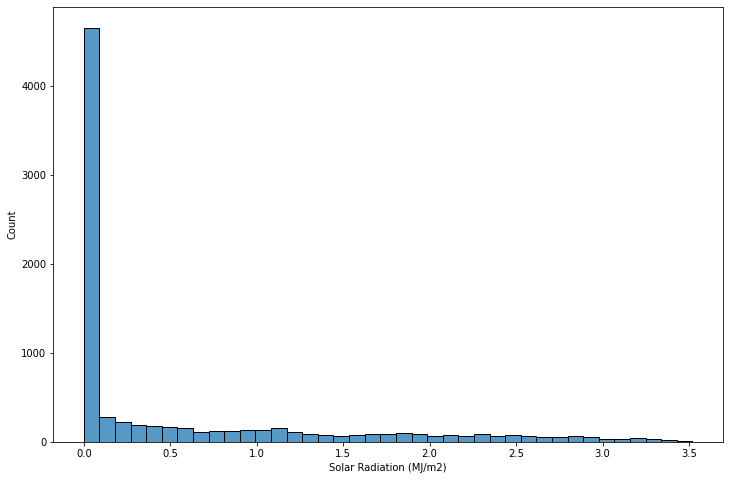

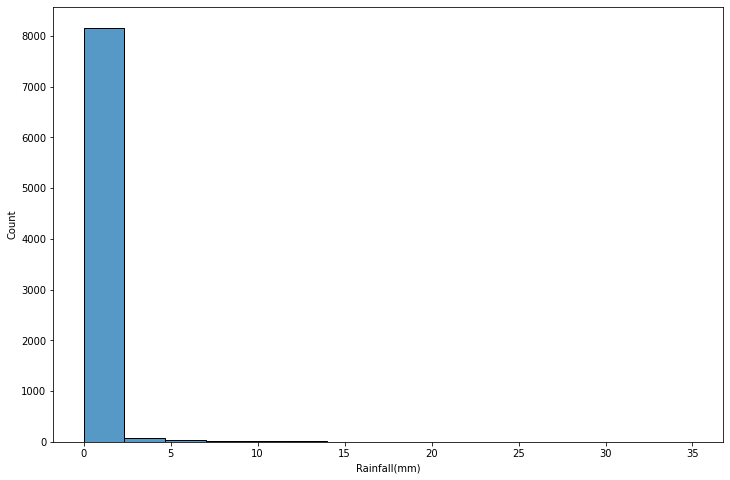

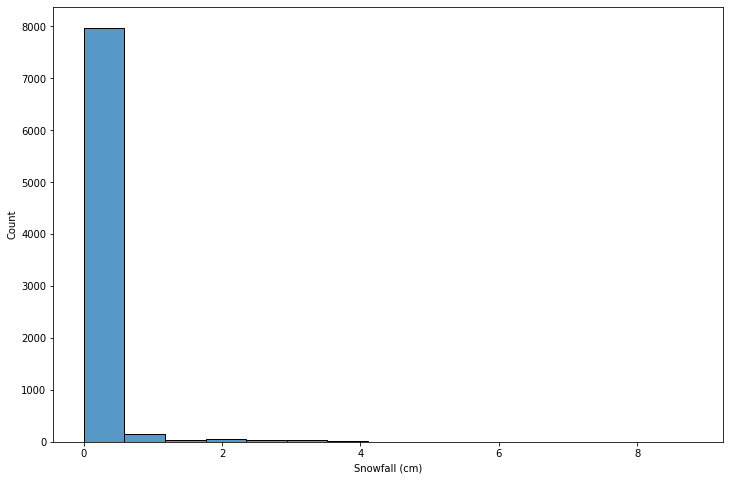

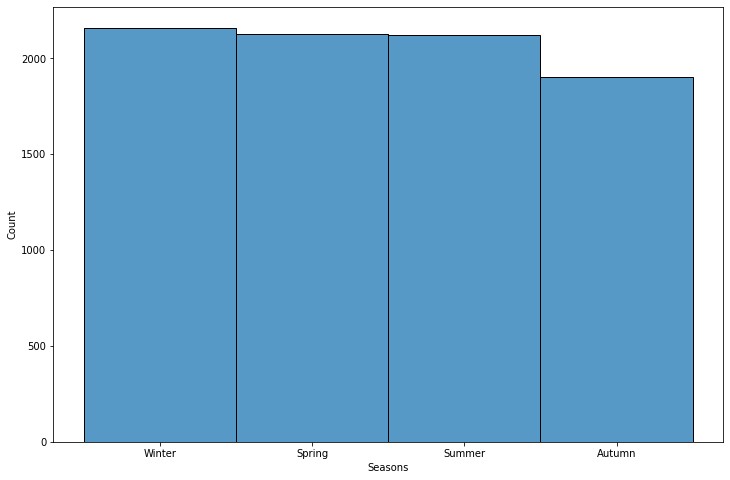

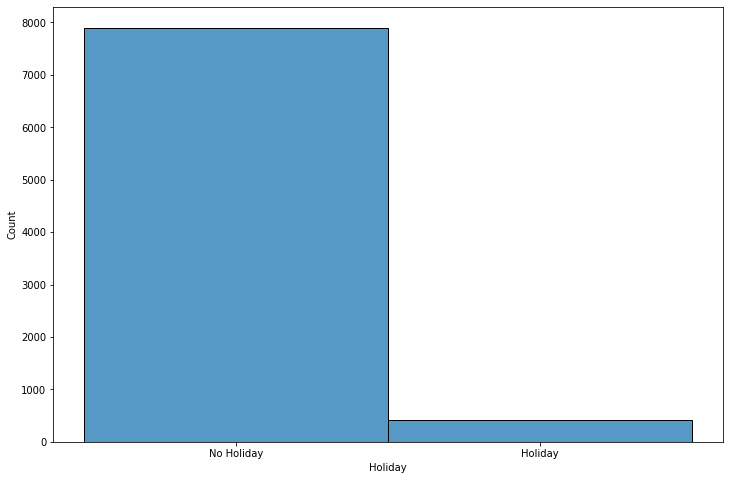

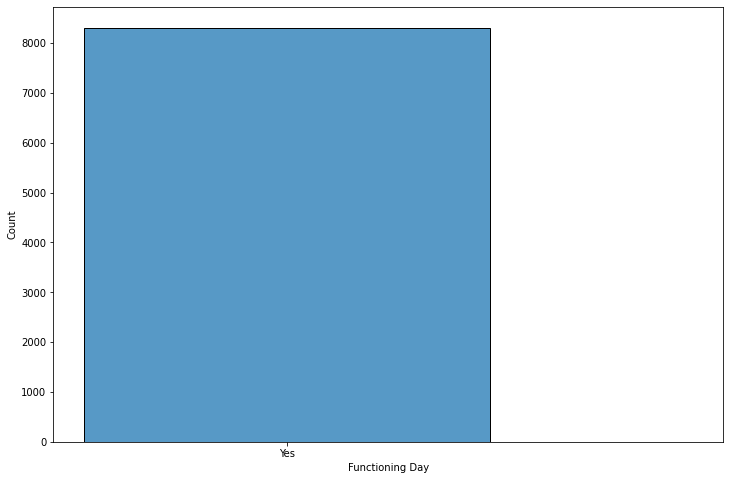

In [ ]:
#creating histogram of features
for col in List_of_numerics:
  plt.figure(figsize=(12,8))
  sns.histplot(Bike_df_copy[col])

#From the above distribution ,we can say that:-   
#1.In our dataset Weather condition feature like ( Tempreture,wind speed,rainfall ) are either normally or either uniform distributed (Not exactly).
#2.Season has four categories of almost equal distribution.
#3.Holday and Functioning day has two categories and No holiday and functioning day (yes) has higher contribution.


#From the above graph in most of the cases when there is no holiday, it also a functioning day , so "**holiday**" and "**functioning day**" column of our dataframe giving us a same infomation so let's remove functioning day feature from dataset because from holiday also we can conclude that if there is holiday it mean it's not functioning day.

In [ ]:
#removind functioning day feature
Bike_df_copy.drop('Functioning Day',axis=1,inplace=True)

#In our dataframe we have date columns using date we can find out it is weekend or weekdays

#**Hourly trend (Number of bike required at each hour):-**

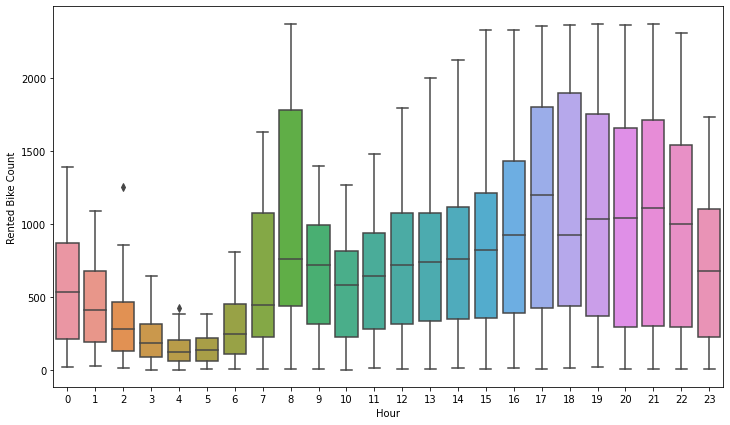

In [ ]:
#creating plot
plt.figure(figsize= (12,7))
sns.boxplot(data=Bike_df_copy,x='Hour',y='Rented Bike Count')

#From the above line plot we can say that in early morning from 5 AM to 8 AM ,there is increasing trend in required number of bikes. i think this is because many people travel through buses and train and they reach in there city in early morning as most people preffered travling during nights, also there is increasing trend in required bike in morning from 10 AM to 6PM evening ,i think this is because of office timimg or work timing ,so many people reach to there office or work location by bike.

#**Seasonal trend (how demand of bike changes with season )**

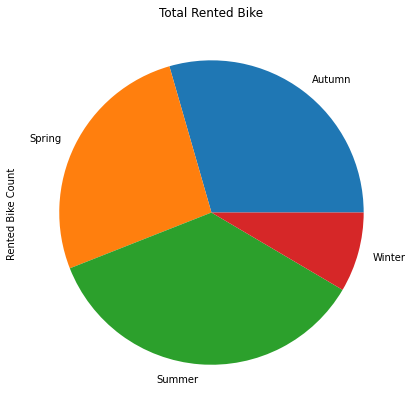

In [ ]:
 #creating plot
 plt.figure(figsize= (12,7))
 plt.title("Total Rented Bike")
 Bike_df_copy.groupby('Seasons')['Rented Bike Count'].sum().plot.pie()

#As we can see from above bar chart that demand of bike is very less during winter season ,i think this is becuase of very less tempreture during winter. and on other seasons demand of bike is not exactly same but higher.

#**How demand of bike change when there is holiday.**

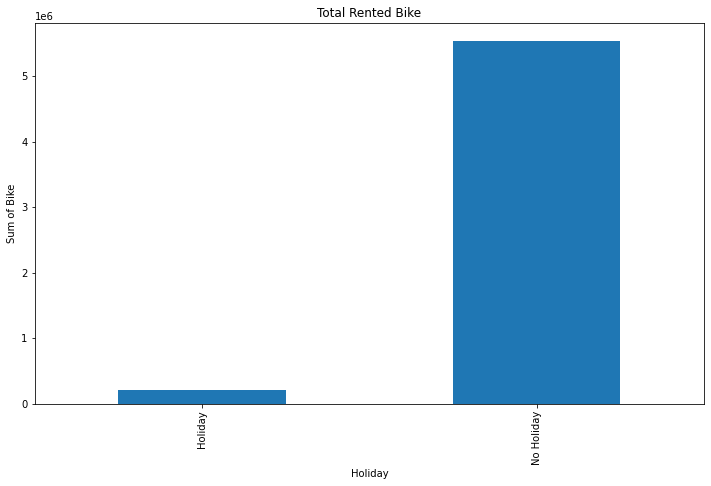

In [ ]:
 #creating plot
 plt.figure(figsize= (12,7))
 plt.title("Total Rented Bike")
 plt.xlabel('Seasons')
 plt.ylabel("Sum of Bike")
 Bike_df_copy.groupby('Holiday')['Rented Bike Count'].sum().plot.bar()

#From the above bar chart we can say that when there is no holiday damand of bike is very high and when there is holiday demand of bike  is very less ,i think it's becuase during holiday people don't travel for either to office or to any work.

#**Monthly  trend (How demand of bike changes over month).**

In [ ]:
#creating a function
Month_list=['January','February','March','April','May','June','July','August','September','October','November','December']
def return_month(integer):
  '''This function take integer as input and return
  corresponding month name
  '''
  return Month_list[integer-1]


In [ ]:
#creating month name column in dataframe
Bike_df_copy['Month_name']=Bike_df_copy['month'].apply(return_month)

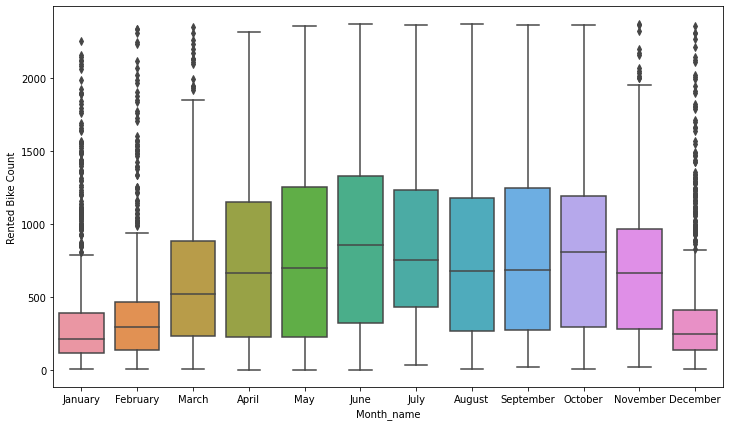

In [ ]:
 #creating plot
plt.figure(figsize= (12,7))
sns.boxplot(data=Bike_df_copy,x='Month_name',y='Rented Bike Count')

In [ ]:
#dropping month_name column
Bike_df_copy.drop('Month_name',axis=1,inplace=True)

#From the above boxplot we can say that at starting and ending of year demand of bike decrease ,apart of these month demand of bike  in other month is equal.


#**Yearly trend (Bike demand increasing over year or not).**

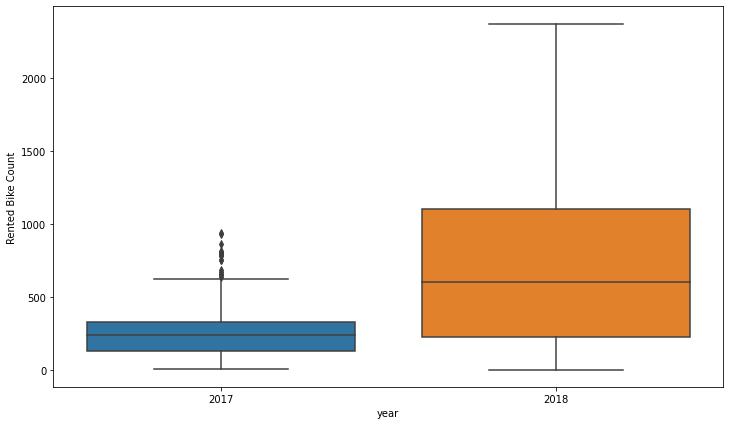

In [ ]:
 #creating plot
plt.figure(figsize= (12,7))
sns.boxplot(data=Bike_df_copy,x='year',y='Rented Bike Count')

#It's interesting right, the demand of bike drastically increasing with year,i think it is because of:-
#1.due to high traffic in city travalling through bike is easier.
#2.cost effective

#**Weekdays trend**

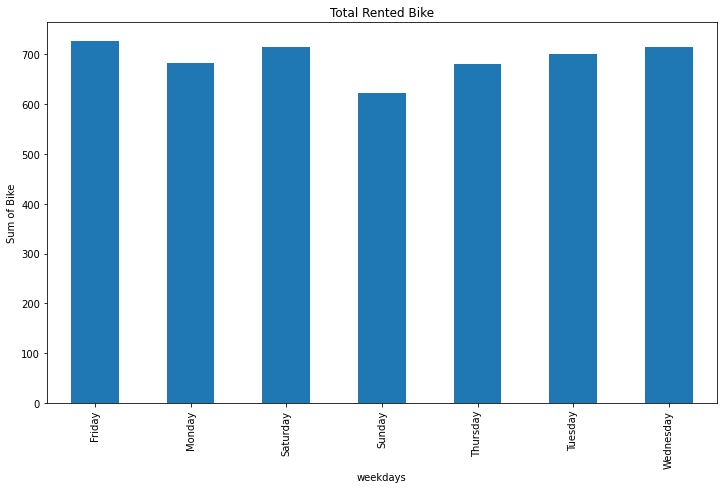

In [ ]:
 #creating plot
 plt.figure(figsize= (12,7))
 plt.title("Total Rented Bike")
 plt.xlabel('weekday')
 plt.ylabel("Sum of Bike")
 Bike_df_copy.groupby('weekdays')['Rented Bike Count'].mean().plot.bar()

#As we can see from above bar plot that on during weekdays (monday to saturday) ,number of required bike count is more compare to weekend(sunday).

#**Number of bike(bike trend) at different-different wheather condition:-**
#From this analysis i just want to see how bike demand changes with weather condition.

In [ ]:
def return_snow_rain(floa):
  if floa==0:
    return 0
  else:
    return 1

In [ ]:
#One Hot encoding for Holiday column
Bike_df_copy['Rainfall(mm)']=Bike_df_copy['Rainfall(mm)'].apply(return_snow_rain)

In [ ]:
#One Hot encoding for Holiday column
Bike_df_copy['Snowfall (cm)']=Bike_df_copy['Snowfall (cm)'].apply(return_snow_rain)

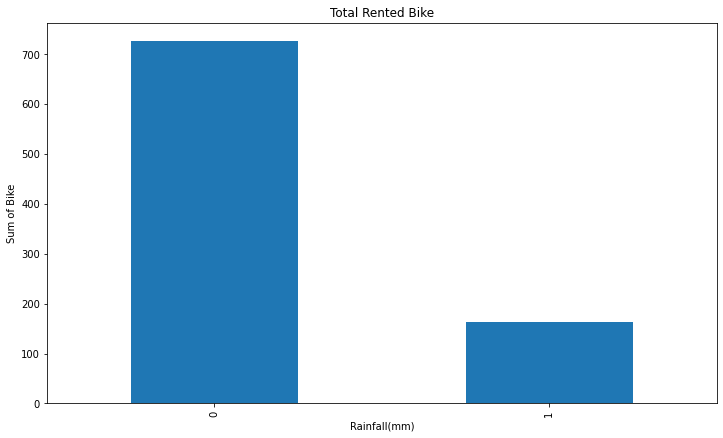

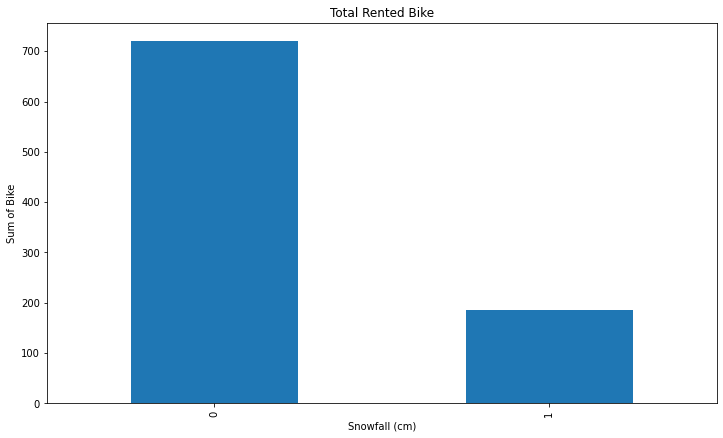

In [ ]:
list_1=['Rainfall(mm)','Snowfall (cm)']
for col in list_1:
 plt.figure(figsize= (12,7))
 plt.title("Total Rented Bike")
 plt.xlabel(col)
 plt.ylabel("Sum of Bike")
 Bike_df_copy.groupby(col)['Rented Bike Count'].mean().plot.bar()

#As we can seen from above garph that at lower and higher tempreture required number of bike is less,same trend with humidity also and when wind speed is higher ,number of required bike is less. i think these are very basic things because of health concern. during high/low tempreture and high wind speed people not preffer bike for travalling from one place to other place.
#Also during rainfall,snowfall,less visibility required bike is very less ,it's obvious, right.as we always concerned about our health so during rainfall ,snowfall, solar radiation, no body prefer bike for travalling.

#Till now we analysed our data like how demand of bike increase or decrease with weather condtion,with year,with month,with season,with holiday.above all the analysis helps us to understand how demand of bike changes.
#**Now let's go to machine learning model,when we started, our main agenda was to solve bike sharing business problem by machine learning model.**
#**So let's start**

#**Feature Engineering**

#In our dataframe we have two features "**Season**" and "**Holiday**" which contain categorical values , we know that to fit data to our machine learning model we need all numerical features,so let's creat dummies for these two columns.

In [ ]:
#creating dummy variable for categorical columns
feature_list=['Seasons']
for col in feature_list:
  Bike_df_copy = pd.get_dummies(data= Bike_df_copy,columns =[col], drop_first=True)

In [ ]:
#creting function of One hot encoding of holiday columns
def return_encode(str_):
  '''
  This function return 1 if there is No holiday and return 0 if there is holiday
  '''
  if str_=='No Holiday':
    return 1
  else:
    return 0

In [ ]:
#One Hot encoding for Holiday column
Bike_df_copy['Holiday']=Bike_df_copy['Holiday'].apply(return_encode)

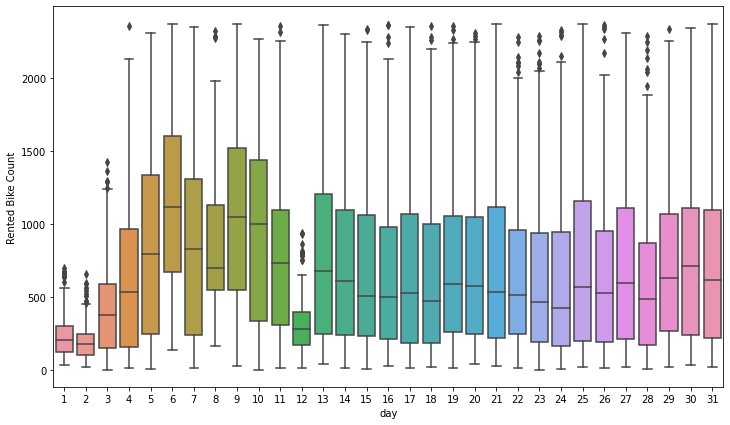

In [ ]:
#creating plot
plt.figure(figsize= (12,7))
sns.boxplot(data=Bike_df_copy,x='day',y='Rented Bike Count')

#On the day of each month demand of bike is not exactly but uniform, so from above boxplot we can say that demand of bike changes with seasons,holiday,weather condition but not with day.
#So let's remove day column from dataframe because demand of bike not changing much on particular day of month.

In [ ]:
#removing day column
Bike_df_copy.drop('day',axis=1,inplace=True)

#In "**Yearly Trend**" analysis we have seen that demand of bike incresing over year,in our dataset we have two year (2017,2018),
#So let's assign weightage to year, because bike demand increasing over year so we will assign lower year with low weightage and higher year with high weightage.

#In yearly weightage i will be creat bins based on quartely

In [ ]:
#creating function
def year_weightage(month,year):
  '''
  This funtion take year as input and return weightage of year
  '''
  if (year==2017) and (month<=3):
    return 1
  elif (year==2017) and (month>3) and (month<=6):
    return 2
  elif (year==2017) and (month>6) and (month<=9):
    return 3
  elif (year==2017) and (month>9) and (month<=12):
    return 4
  elif (year==2018) and (month<=3):
    return 5
  elif (year==2018) and (month>3) and (month<=6):
    return 6
  elif (year==2018) and (month>6) and (month<=9):
    return 7
  else:
    return 8

In [ ]:
#creating year weightage new column
Bike_df_copy['month_year_bins']=Bike_df_copy.apply(lambda x:year_weightage(x.month,x.year),axis=1)

In [ ]:
#dropping year column
Bike_df_copy.drop('year',axis=1,inplace=True)
Bike_df_copy.drop('month',axis=1,inplace=True)

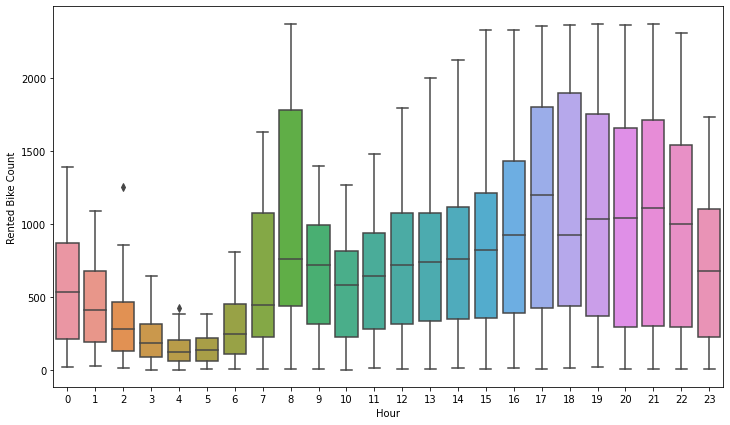

In [ ]:
#creating plot
plt.figure(figsize= (12,7))
sns.boxplot(data=Bike_df_copy,x='Hour',y='Rented Bike Count')

#As we can seen from above box plot that number of required bike count changes with different-different hours, In some hours required bike are less and in some hours required bike count are larger , based on how number of bike varies with hours we will creat some bins ,when number of bike required is high we will assign higher weightage to that hours and when number of bike required is less we assign less weightage to that particular hours.

In [ ]:
#creating function
def return_hour_bin(inte):
  '''
  This function return hours as input and return bins based on required bike count
  '''
  if inte==18:
    return 8
  elif inte==8 or inte==17 or inte==19:
    return 7
  elif inte==20 or inte==21:
    return 6
  elif inte==22 or inte==16:
    return 5
  elif inte==0 or inte==10 or inte==11:
    return 3
  elif inte==1 or inte==2 or inte==6:
    return 2
  elif inte==3 or inte==4 or inte==5:
    return 1
  else:
    return 4

In [ ]:
#creating  new column
Bike_df_copy['Hour_bins']=Bike_df_copy['Hour'].apply(return_hour_bin)

In [ ]:
#dropping hour column
Bike_df_copy.drop('Hour',axis=1,inplace=True)

#Now we have a dataframe which we will use for further,in our dataframe our target/dependent variable is "**Rented Bike Count**" and all other variable is independent variable.Now we will build machine learning model for prediction of target variable.
#before fitting our data to model first let's see how our target/dependent variable is distributed.

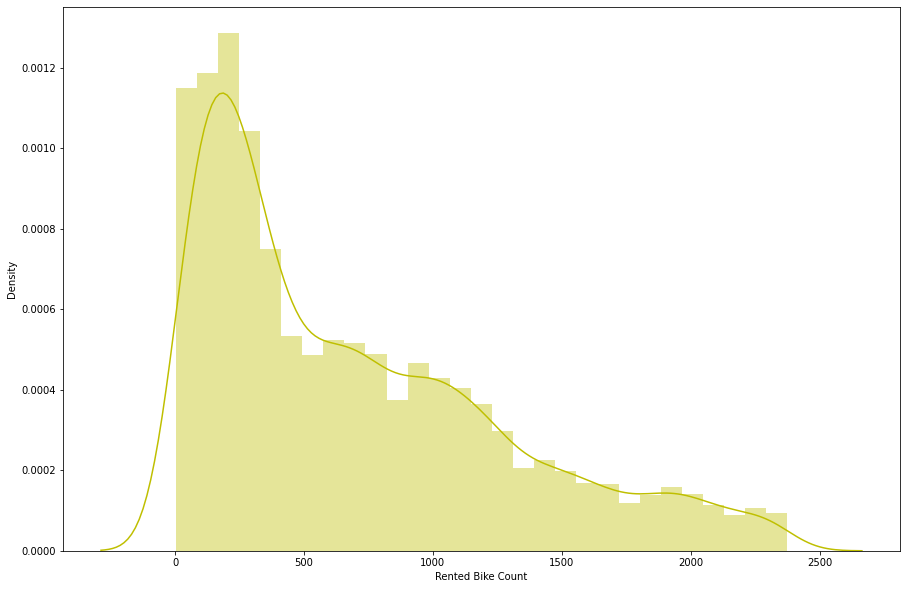

In [ ]:
# Dependent variable 'Rented Bike Count' distribution
plt.figure(figsize=(15,10))
sns.distplot(Bike_df_copy['Rented Bike Count'],color="y")

#As we can see from above plot that our target variable is positive skewed distributed not normal,Linear regression will make more reliable predictions if our independent and dependent variables have a normal distribution,earlier in feature distribution we already seen that not all but some independent features are normally distributed. so let's do transformation of our target feature.

#We will do square-root transformation on our target variable.

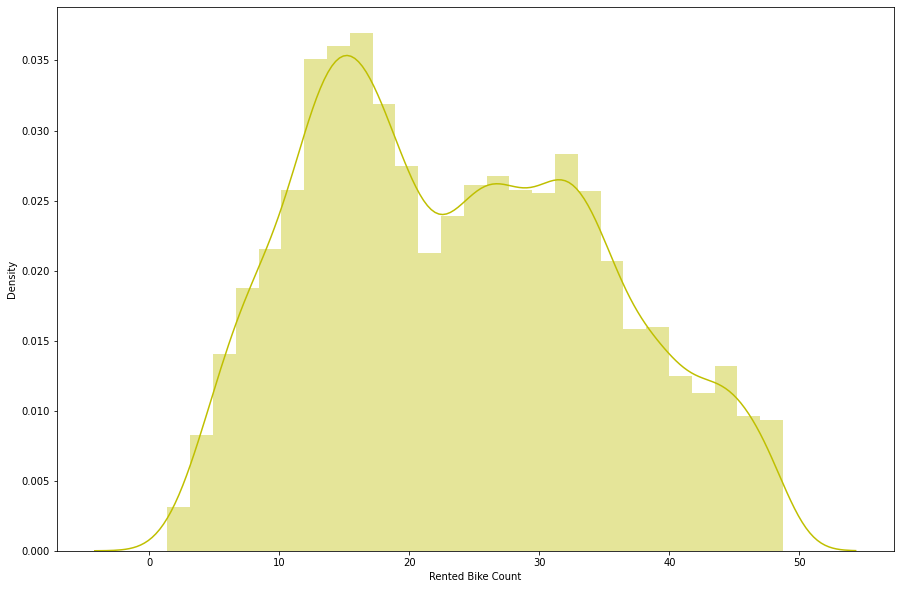

In [ ]:
#crreating plot after square-root transformation
plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(Bike_df_copy['Rented Bike Count']),color="y")

#After square-root transformation we can see from above plot that our target variable is normally distributed, so let's creat new column in our dataframe which contain square root of our target variable.

In [ ]:
#creating function
def return_square_root(integer):
  '''
  This function take integer as input and return
  square-root of that integer.
  '''
  return np.sqrt(integer)

In [ ]:
#creating new column root rented bike count
Bike_df_copy['Root_rented_bike_count']=Bike_df_copy['Rented Bike Count'].apply(return_square_root)

#Linear regression machine learning model have some assumption.
#Linear Assumption: Linear regression assumes that the relationship between your independent and dependent is linear.
#Remove Collinearity: Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated,and more.
#so before fitting our data to linear regression model,let's first check for assumption.

#**Linear Dependencies**

In [ ]:
Bike_df_copy.head(2)

,Rented Bike Count,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,weekdays,Seasons_Spring,Seasons_Summer,Seasons_Winter,month_year_bins,Hour_bins,Root_rented_bike_count
0,254,-5.2,37,2.2,2000,-17.6,0.0,0,0,1,Friday,0,0,1,1,3,15.937377
1,204,-5.5,38,0.8,2000,-17.6,0.0,0,0,1,Friday,0,0,1,1,2,14.282857


In [ ]:
#creating list of numeric features
List_of_numerics_feature=['Temperature(蚓)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

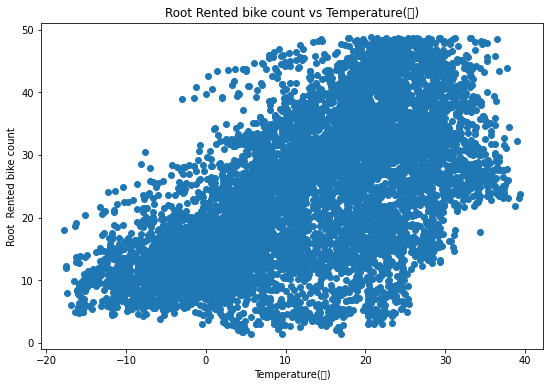

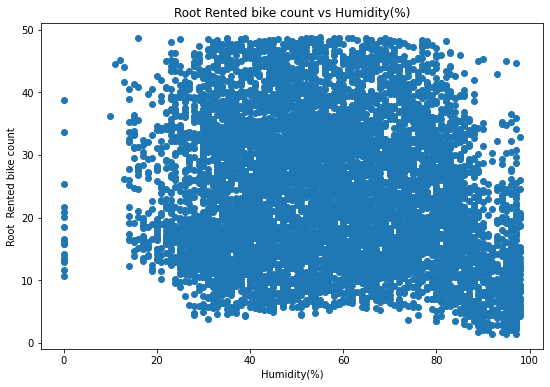

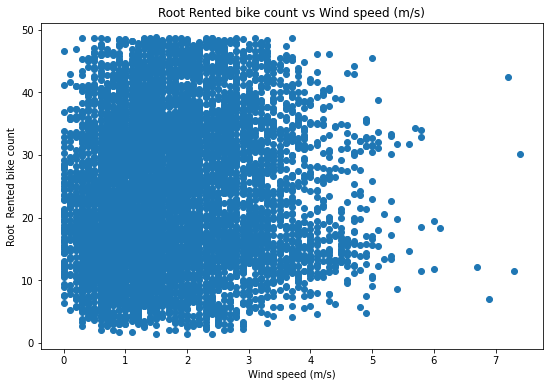

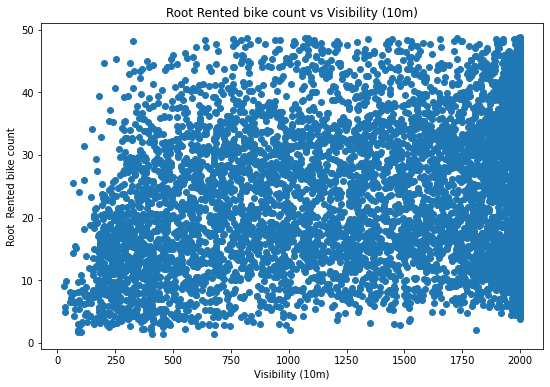

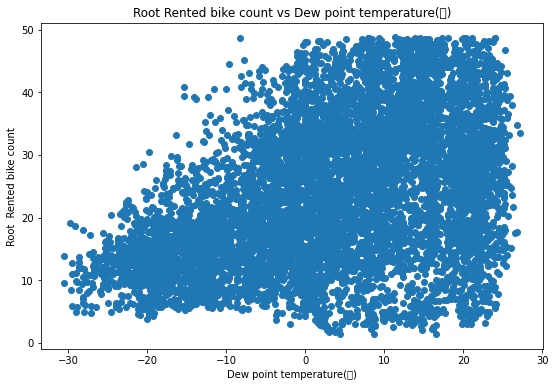

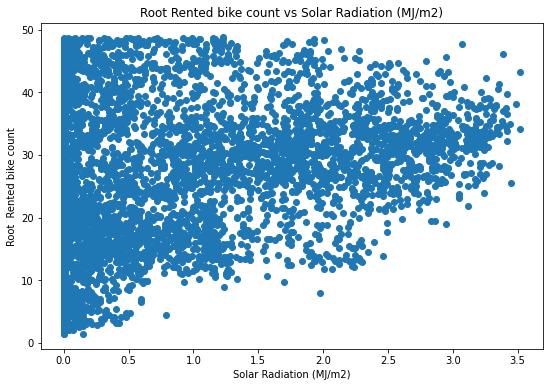

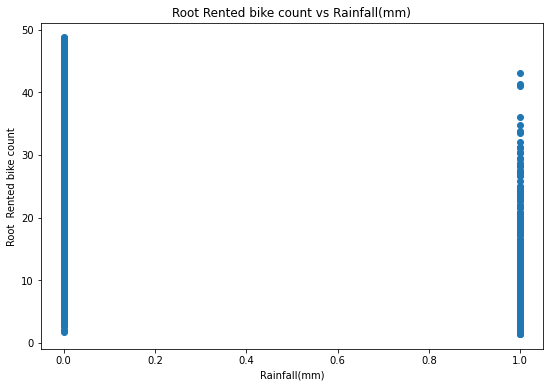

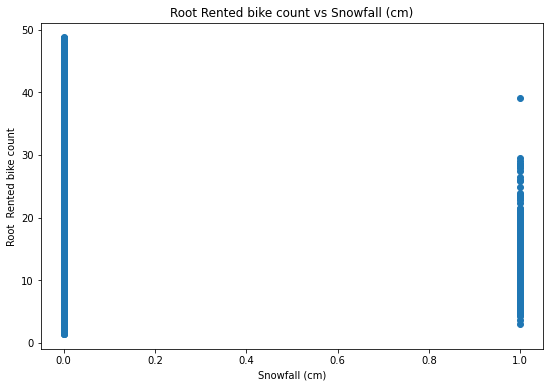

In [ ]:
for col in List_of_numerics_feature:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature =Bike_df_copy[col]
  label =Bike_df_copy['Root_rented_bike_count']
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Root  Rented bike count')
  ax.set_title('Root Rented bike count vs ' + col )

#From above scatterplot we can say that some independent variable with dependent variable are linear related and some are non-linearly related.

#Now, lets find the correlation between the variables to further analyse the dependencies between variables.


#**Multicollinearity and correlation between variable**

In [ ]:
#dropping rented bike count bcz our target feature is root of rented bike count
Bike_dff=Bike_df_copy.drop('Rented Bike Count',axis=1)

In [ ]:
#dropping rented bike count bcz our target feature is root of rented bike count
Bike_dff=Bike_df_copy.drop('weekdays',axis=1)

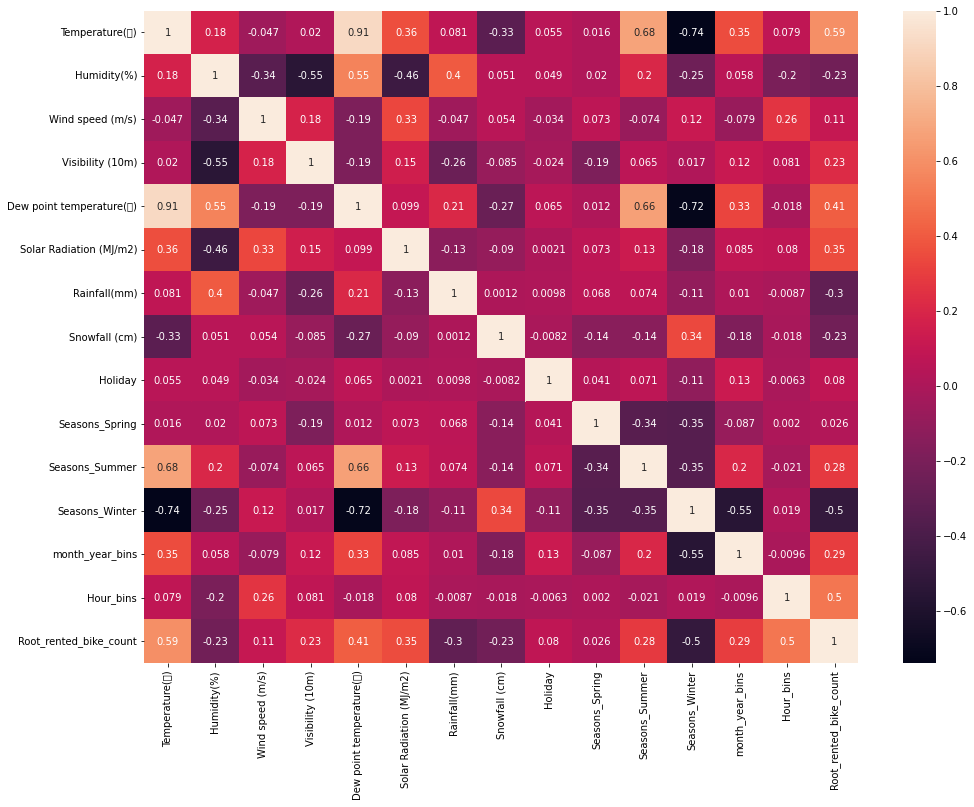

In [ ]:
#creating heatmap
plt.figure(figsize = (16,12))
sns.heatmap(Bike_dff.corr(),annot=True)

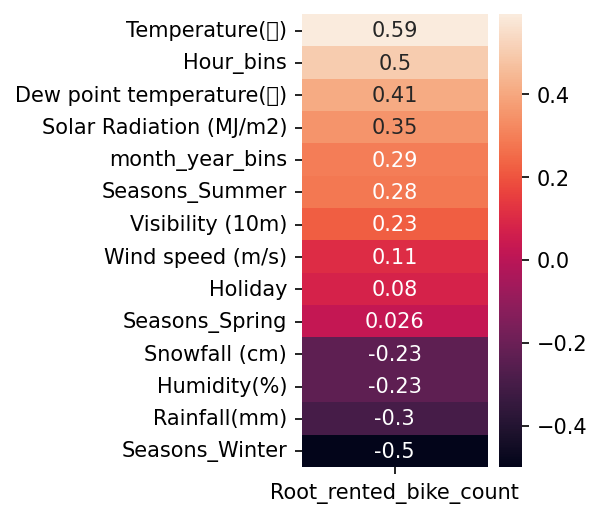

In [ ]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(Bike_dff.corr()[["Root_rented_bike_count"]].sort_values
            (by="Root_rented_bike_count", ascending=False)[1:],annot=True)

#As we can see from above correlation heatmap that **tempreture** is highly correlated with **Dew point tempreture** ,so there is collinearity between these two features.
#To remove multicollinearity from our data we need to remove either **tempreture** column or **Dew point tempreture** column.
#As we can see from heatmap that **tempreture** column has **high correlation** with our **target variable (rented bike count)** compare to **Dew point tempreture** ,so let's remove **Dew point tempreture** column from our dataframe.
#Apart from these two features ,there is no high correlation between independent features of our data.

#Season_summer and Season_winter is also highly correlated with tempreture,it's obvious becuase tempreture increase in summer and decreases in winter. so let's remove these two columns from dataframe.

In [ ]:
#dropping "Dew point tempreture", "Season summer" ,"Season winter" from dataframe
Bike_dff.drop('Dew point temperature(蚓)',axis=1,inplace=True)


In [ ]:
Bike_dff.drop('Wind speed (m/s)',axis=1,inplace=True)

In [ ]:
Bike_dff.drop('Holiday',axis=1,inplace=True)

In [ ]:
Bike_dff.drop('Seasons_Spring',axis=1,inplace=True)

In [ ]:
#calculation varience inflation factor for multicollineariity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  '''
  This function calculate varience inflation factor for feature .
  '''
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

#Varience inflation factor help us in removing multicollinearity,so lets calculated VIF for our features

In [ ]:
#Calculating vif for features
calc_vif(Bike_dff[[col for col in Bike_dff.describe().columns if col not in ['Holiday','Seasons_Autumn','Seasons_Spring','month_year_bins','Root_rented_bike_count','Hour_bins']]])

,variables,VIF
0,Temperature(蚓),9.638714
1,Humidity(%),5.910595
2,Visibility (10m),4.302064
3,Solar Radiation (MJ/m2),2.135404
4,Rainfall(mm),1.260773
5,Snowfall (cm),1.261996
6,Seasons_Summer,2.773594
7,Seasons_Winter,2.883873


#As we calculated varience inflation factor for our dataframe features and we can say from above dataframe that for** all numeric features varience inflation factor is less than 10**, so we can keep these feature to fit in our linear regression machine learning model.

#Till now we have done data pre-processing and also checked for linear regression assumption,now our data is ready to fit in machine linear model so lets build linear regression model and also we will build fit our data to other machine learning model and then we will compare which model is performing well on our data.
#**Let's start to build machine learning model.**

#**Implementing Linear Regression**

In [ ]:
#importing library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#creating dependent and independent for model
dependent_variable = 'Root_rented_bike_count'
independent_variables = list(set(Bike_dff.columns.tolist()) - {dependent_variable})

In [ ]:
# Create the data of independent variables
X =Bike_dff[independent_variables].values

# Create the for dependent variable data
y =Bike_dff[dependent_variable].values

In [ ]:
# Splitting the dataset into the Training set and Test set for model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Transforming data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# Fitting Linear Regression to the Training set
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predicting on train data
y_prediction_train = regressor.predict(X_train)

In [ ]:
# Predicting on test data
y_prediction_test= regressor.predict(X_test)

#We built machine learning regression model for predicting **"Rented bike count"**.now we need to evalute our model becuase:-
#It is necessary to obtain the accuracy on training data, But it is also important to get a genuine and approximate result on unseen data otherwise Model is of no use.
#So to build a generalized model we require to Evaluate the model on different metrics which helps us to better optimize the performance, and obtain a better result.
#For evolution of model we will use **Mean_squared_error , Root_mean_squared_error, R_squared ,Adjusted_r_squared metrices.**

#As we have done root of our target variable before,so whatever our model will predict we have to do square of it to get actual prediction of **"rented bike count".**

In [ ]:
#Evalution metrices on train data
MSE  =np.round(mean_squared_error(y_train*y_train,y_prediction_train*y_prediction_train))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train*y_train,y_prediction_train*y_prediction_train),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_train*y_train,y_prediction_train*y_prediction_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 106542.0
RMSE : 326.0
R2 score: 0.692
Adjusted R2 :  0.691


In [ ]:
#Evaluation metrices on test data
MSE  = np.round(mean_squared_error(y_test*y_test,y_prediction_test*y_prediction_test),2)
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test*y_test,y_prediction_test*y_prediction_test),3)
print("R2 score:" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test*y_test,y_prediction_test*y_prediction_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 98661.77
RMSE : 314.1
R2 score: 0.706
Adjusted R2 :  0.704


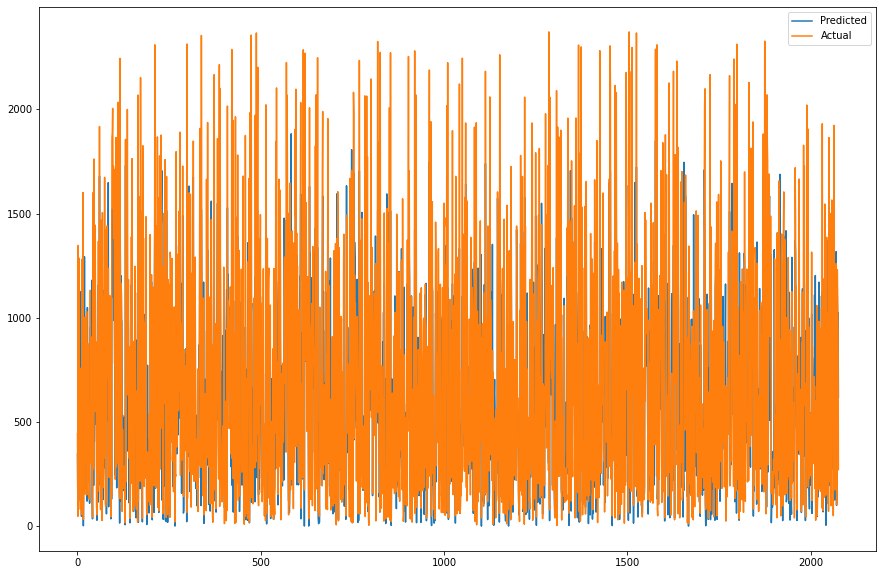

In [ ]:
#creating plot between actual and predicted value
plt.figure(figsize=(15,10))
plt.plot(y_prediction_test*y_prediction_test)
plt.plot((np.array(y_test*y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#By linear regression model we are getting R2_score is equal to .48 and root mean squared error is 458 on test data, similar for training data,our model performace is same on training and test data.
#Now we will do cross validation and regulerization on linear regression model and also build different model so that we can compare which model performance is better.

#**Implementing Elasic Net**

In [ ]:
#importing elastic net
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.8)

In [ ]:
#fitting data
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.01, l1_ratio=0.8)

In [ ]:
#making prediction on test data
y_pred_en = elasticnet.predict(X_test)

In [ ]:
#Evaluating metrices
MSE  = np.round(mean_squared_error((y_test*y_test), (y_pred_en*y_pred_en)))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score((y_test*y_test), (y_pred_en*y_pred_en)),3)
print("R2 :" ,r2)


MSE : 95358.0
RMSE : 309.0
R2 : 0.716


#**Cross validation and Hyperparameter tunning**
#After using elastic net R2 score remain same so let's do cross validation and parameter tunning if we can improve our model performance

In [ ]:
#Cross validation and hyper parameter tunning
from sklearn.model_selection import GridSearchCV
elastic = ElasticNet()
parameters = {'alpha': [1e-30,1e-28,1e-26,1e-24,1e-22,1e-20,1e-18,1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40],'l1_ratio':[.0001,.001,.01,.1,.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,.10,.11,.12,.13,.14,.15,.20,.25,.30,.35]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='r2',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-30, 1e-28, 1e-26, 1e-24, 1e-22, 1e-20,
                                   1e-18, 1e-15, 1e-13, 1e-10, 1e-08, 1e-05,
                                   0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6,
                                   7, 8, 9, 10, 15, 20, 25, 30, ...],
                         'l1_ratio': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4,
                                      0.5, 0.6, 0.7, 0.8, 0.9, 0.1, 0.11, 0.12,
                                      0.13, 0.14, 0.15, 0.2, 0.25, 0.3, 0.35]},
             scoring='r2')

In [ ]:
#making prediction on test data
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.6}

Using  {'alpha': 0.001, 'l1_ratio': 0.6}  the negative mean squared error is:  0.7361049016287433


#We have given different alpha and l1-ratio value, so the best alpha value is .0001 and l1-ratio is .9 ,if we evalute our model on r_2score.

In [ ]:
MSE  =np.round(mean_squared_error((y_test*y_test), (y_pred_elastic*y_pred_elastic)))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 = np.round(r2_score((y_test*y_test), (y_pred_elastic*y_pred_elastic)),3)
print("R2 :" ,r2)


MSE : 93682.0
RMSE : 306.0
R2 : 0.721


#From the above evalution metrices we can say that Linear regression model is performing well than elastic Net,
#Now let's build other model so that we can compare all other model.

In [ ]:
#removing root rented bike count column
Bike_df_copy.drop('Root_rented_bike_count',axis=1,inplace=True)

#**implementing Decision tree**

#**Decision trees and ensemble methods do not require feature scaling to be performed** as they are not sensitive to the the variance in the data.
#**multicollinearity does not affect the  prediction of model** but we are not only looking for prediction ,we will use decision tree to extract the feature importance for further analysis and **then Multicollinearity may have some bad effects, it makes the coefficients (feature importances) unstable and incorrect.**
#Because of feature importance and model explainbility ,i am removing correlated feature.



#In ealier in linear regression model we have seen that **'Dew point temperature(蚓)' ,'Seasons_Summer', 'Seasons_Winter'** are correlated with tempreture so let's remove these columns.

In [ ]:
#removing correlated features
Bike_df_copy.drop('Dew point temperature(蚓)',axis=1,inplace=True)
Bike_df_copy.drop('Seasons_Summer',axis=1,inplace=True)
Bike_df_copy.drop('Seasons_Winter',axis=1,inplace=True)

In [ ]:
Bike_df_copy.drop('weekdays',axis=1,inplace=True)

In [ ]:
#importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#creating dependent and independent for model
dependent_variable_tree='Rented Bike Count'
independent_variable_tree=list(set(Bike_df_copy.columns.tolist()) - {dependent_variable_tree})

In [ ]:
# Create the data of independent variables
X_tree=Bike_df_copy[independent_variable_tree]

# Create the for dependent variable data
y_tree=Bike_df_copy[dependent_variable_tree]

In [ ]:
#splitting data into training and test data
X_train_tree, X_test_tree, y_train_tree, y_test_tree=train_test_split(X_tree, y_tree, test_size=0.20, random_state=0)

In [ ]:
#fitting data to decision tree
Decision_regressor=DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None, max_features=None, max_leaf_nodes=None,splitter='best',min_samples_split=2, min_samples_leaf=5)
Decision_regressor.fit(X_train_tree, y_train_tree)

DecisionTreeRegressor(min_samples_leaf=5)

In [ ]:
#predicting on train and test data
y_predicted_train_tree=Decision_regressor.predict(X_train_tree)
y_predicted_test_tree=Decision_regressor.predict(X_test_tree)

In [ ]:
#Evaluating metrices
MSE  =np.round(mean_squared_error(y_train_tree,y_predicted_train_tree))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train_tree,y_predicted_train_tree),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_train_tree,y_predicted_train_tree))*((X_train_tree.shape[0]-1)/(X_train_tree.shape[0]-X_train_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 57617.0
RMSE : 240.0
R2 : 0.832
Adjusted R2 :  0.832


In [ ]:
#Evaluating metrices
MSE  =mean_squared_error(y_test_tree,y_predicted_test_tree)
print("MSE :" , MSE)

RMSE =np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test_tree,y_predicted_test_tree),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test_tree,y_predicted_test_tree))*((X_test_tree.shape[0]-1)/(X_test_tree.shape[0]-X_test_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 73575.87959627715
RMSE : 271.24874118837334
R2 : 0.787
Adjusted R2 :  0.784


In [ ]:
y_test_tree

2101     444
6462      47
7582    1347
4253     174
5950    1286
        ... 
1815     461
8375     757
7553    1685
8204    1062
7663    1216
Name: Rented Bike Count, Length: 1662, dtype: int64

In [ ]:
y_predicted_test_tree

array([ 317.5       ,  195.81818182, 1022.44444444, ..., 1746.22222222,
       1070.        ,  670.13333333])

#As we can see from above evalution metrices that with the help of decision tree regressor model we are able to improve our model performance compare to linear regression and Elastic net.
#Also on training data our model performing well but on test data we are getting less r2_score and also higher error.To overcome overfitting we will do hyperparameter tunning.
#Now we will do hyperparameter tunning to find out best parameter of our decision tree model.

#As we can see that our model used so many alpha value but during hyper parameter tunning we will use some of this value.

In [ ]:
#defining parameter for model
parameters={"max_depth" : [1,2,3,5,7,9,11,12,15,20,25,50,100],
           "min_samples_leaf":[1,2,3,4,5,10,15,20,40,60,80,100],
           "max_leaf_nodes":[None,10,20,30,40,50,70,100,140,150]}

In [ ]:
#building decision tree regression model with cross validation and hyper parameter tunning
reg_decision_model=DecisionTreeRegressor()
tuning_Decision_regressor=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3)
tuning_Decision_regressor.fit(X_train_tree, y_train_tree)

In [ ]:
#gettting best hyperparameter
tuning_Decision_regressor.best_params_

In [ ]:
#prediction on train and test data
tune_y_train_pred=tuning_Decision_regressor.predict(X_train_tree)
tune_y_test_pred=tuning_Decision_regressor.predict(X_test_tree)

In [ ]:
#Evaluating metrices
MSE  =np.round(mean_squared_error(y_train_tree,tune_y_train_pred))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train_tree,tune_y_train_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_train_tree,tune_y_train_pred))*((X_train_tree.shape[0]-1)/(X_train_tree.shape[0]-X_train_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

In [ ]:
#Evaluating metrices
MSE  =mean_squared_error(y_test_tree,tune_y_test_pred)
print("MSE :" , MSE)

RMSE =np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test_tree,tune_y_test_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test_tree,tune_y_test_pred))*((X_test_tree.shape[0]-1)/(X_test_tree.shape[0]-X_test_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

#We can overcome overfitting by pruning of our tree as well.
#DecisionTree in sklearn has a function called cost_complexity_pruning_path, which gives the effective alphas of subtrees during pruning and also the corresponding impurities. In other words, we can use these values of alpha to prune our decision tree:
#We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeRegressor and we can find out alpha value where our test r2_score is higher and we gettting minimum error

In [ ]:
Path=Decision_regressor.cost_complexity_pruning_path(X_train_tree,y_train_tree)
alphas=Path['ccp_alphas']
len(alphas)

#Let's fit every value of alpha in our model and find out on which value of alpha we are getting maximum r2_score




In [ ]:
#fitting value of alpha in our model
accuracy_train,accuracy_test=[],[]
for i in alphas:
  tree=DecisionTreeRegressor(ccp_alpha=i)
  tree.fit(X_train_tree,y_train_tree)
  y_train_pred=tree.predict(X_train_tree)
  y_test_pred=tree.predict(X_test_tree)
  accuracy_train.append(r2_score(y_train_tree,y_train_pred))
  accuracy_test.append(r2_score(y_test_tree,y_test_pred))
index_max_test_accuracy=accuracy_test.index(max(accuracy_test))
alpha_at_max_test_accuracy=alphas[index_max_test_accuracy]

In [ ]:
#Plotting train and test accuracy
sns.set()
plt.figure(figsize=(14,8))
sns.lineplot(y=accuracy_train,x=alphas,label='Train_accuracy')
sns.lineplot(y=accuracy_test,x=alphas,label='Test_accuracy')

#From the above plot we can say that our highest r2_score is near .7 ,at this point our train accuracy is decreased but our model is now more generalized,we also calucalted alpha value where we are getting maximum r2_score.

In [ ]:
alpha_tree=DecisionTreeRegressor(ccp_alpha=alpha_at_max_test_accuracy)
alpha_tree.fit(X_train_tree,y_train_tree)
alpha_train_pred=alpha_tree.predict(X_train_tree)
alpha_test_pred=alpha_tree.predict(X_test_tree)
print(r2_score(y_train_tree,alpha_train_pred))
print(r2_score(y_test_tree,alpha_test_pred))

#Till now we build decision tree and linear regression model to predict target variable,Now we will also build two more model to compare performance.

In [ ]:
#fitting data to model
from sklearn.ensemble import RandomForestRegressor
rfr =RandomForestRegressor(n_estimators= 100,ccp_alpha=0.0, criterion='mse',max_depth=11,max_leaf_nodes=None,max_samples=None,min_samples_leaf=20,min_samples_split=2)
rfr.fit(X_train_tree, y_train_tree)

RandomForestRegressor(criterion='mse', max_depth=11, min_samples_leaf=20)

In [ ]:
#prediction on train and test data
random_y_train_pred=rfr.predict(X_train_tree)
random_y_test_pred=rfr.predict(X_test_tree)

In [ ]:
#Evaluating metrices
MSE  =np.round(mean_squared_error(y_train_tree,random_y_train_pred))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train_tree,random_y_train_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_train_tree,random_y_train_pred))*((X_train_tree.shape[0]-1)/(X_train_tree.shape[0]-X_train_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 75318.0
RMSE : 274.0
R2 : 0.78
Adjusted R2 :  0.78


In [ ]:
#Evaluating metrices
MSE  =mean_squared_error(y_test_tree,random_y_test_pred)
print("MSE :" , MSE)

RMSE =np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test_tree,random_y_test_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test_tree,random_y_test_pred))*((X_test_tree.shape[0]-1)/(X_test_tree.shape[0]-X_test_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 78631.32561343891
RMSE : 280.41277719362023
R2 : 0.772
Adjusted R2 :  0.769


In [ ]:
#plotting actual and predicted value
plt.figure(figsize=(10,7))
plt.scatter(y_test_tree,random_y_test_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(random_y_test_pred), max(y_test_tree))
p2 = min(min(random_y_test_pred), min(y_test_tree))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Now we will use XGBOOST algorithem for prediction

In [ ]:
#Importing xgboost
from xgboost.sklearn import XGBRegressor

In [ ]:
#splitting data into training and test data
X_train_tree, X_test_tree, y_train_tree, y_test_tree=train_test_split(X_tree, y_tree, test_size=0.20, random_state=0)

In [ ]:
#Defining xgb
xgb=XGBRegressor()
xgb.fit(X_train_tree,y_train_tree)

[15:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#predicting on test and train data
xgb_train_pred=xgb.predict(X_train_tree)
xgb_test_pred=xgb.predict(X_test_tree)

In [ ]:
#Evaluating metrices
MSE  =np.round(mean_squared_error(y_train_tree,xgb_train_pred))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train_tree,xgb_train_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_train_tree,xgb_train_pred))*((X_train_tree.shape[0]-1)/(X_train_tree.shape[0]-X_train_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 82297.0
RMSE : 287.0
R2 : 0.76
Adjusted R2 :  0.759


In [ ]:
#Evaluating metrices
MSE  =mean_squared_error(y_test_tree,xgb_test_pred)
print("MSE :" , MSE)

RMSE =np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test_tree,xgb_test_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test_tree,xgb_test_pred))*((X_test_tree.shape[0]-1)/(X_test_tree.shape[0]-X_test_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 79462.37438497285
RMSE : 281.8907135486603
R2 : 0.77
Adjusted R2 :  0.766


#Now we will perform cross validation and hyper parameter tunning to increase model performence

In [ ]:
#Hyper parameter tunning
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gsearch1.fit(X_train_tree,y_train_tree)
gsearch1.best_params_

[03:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'max_depth': 9, 'min_child_weight': 5}

In [ ]:
#Prediction on test data
grid_xgb_test_pred=gsearch1.predict(X_test_tree)

In [ ]:
#Evaluating metrices
MSE  =np.round(mean_squared_error(y_test_tree,grid_xgb_test_pred))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test_tree,grid_xgb_test_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test_tree,grid_xgb_test_pred))*((X_test_tree.shape[0]-1)/(X_test_tree.shape[0]-X_test_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 98417.0
RMSE : 314.0
R2 : 0.765
Adjusted R2 :  0.763


#Model explaination by using SHAP

In [ ]:
#Installing SHAP
!pip install shap

     |████████████████████████████████| 564 kB 33.0 MB/s 


In [ ]:
explainer = shap.TreeExplainer(xgb)
import shap
shap.initjs()
shap_values = explainer.shap_values(X_train_tree)
i =0
shap.force_plot(explainer.expected_value, shap_values[i], features=X_train_tree.loc[0], feature_names=X_train_tree.columns)

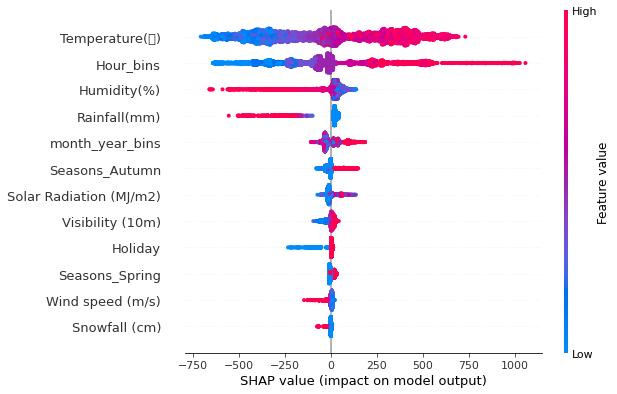

In [ ]:
shap.summary_plot(shap_values, features=X_train_tree, feature_names=X_train_tree.columns)

#We get the above plot by putting everything together under one roof. This shows the Shap values on the x-axis. Here, all the values on the left represent the observations that shift the predicted value in the negative direction while the points on the right contribute to shifting the prediction in a positive direction. All the features are on the left y-axis.

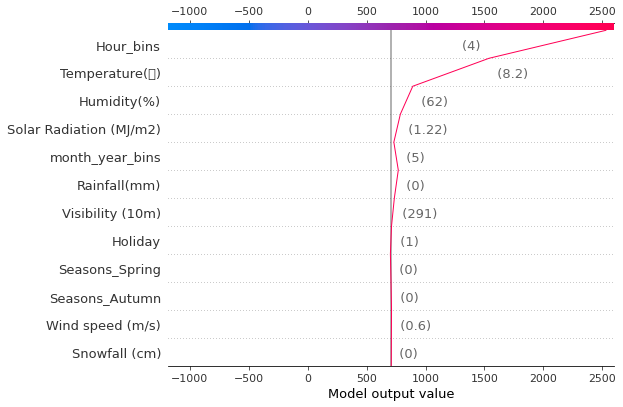

In [ ]:
shap.decision_plot(explainer.expected_value,shap_values[1],X_train_tree)

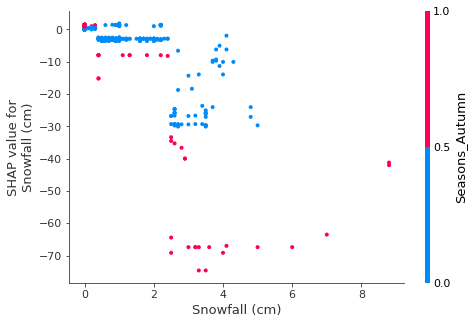

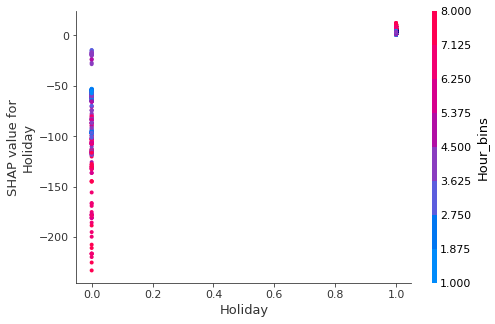

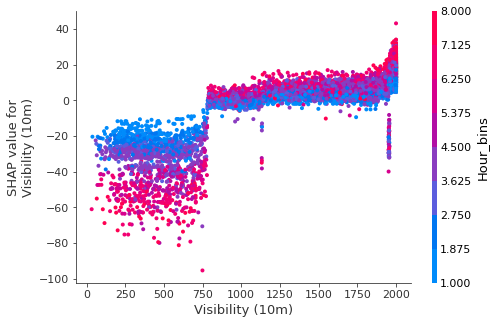

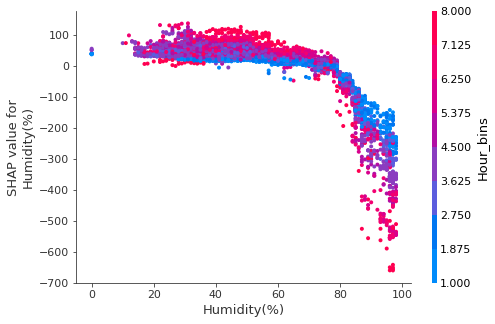

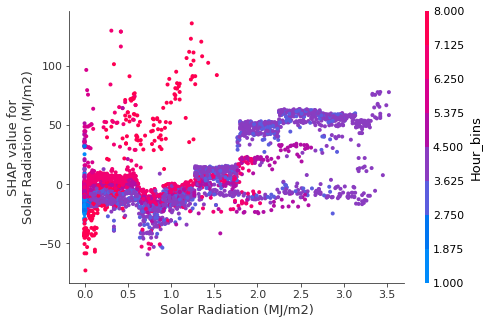

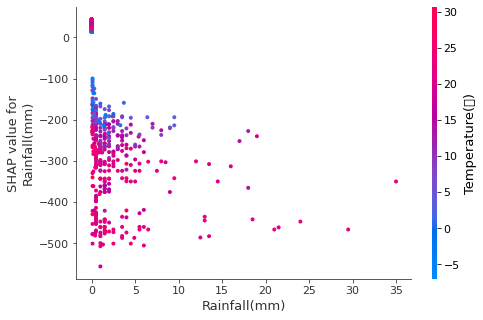

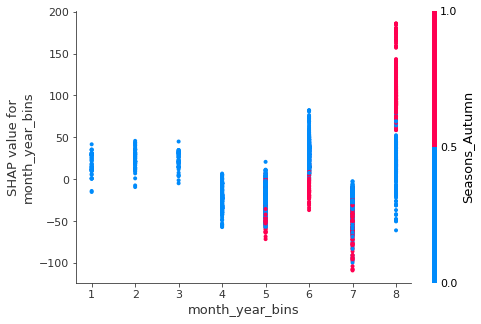

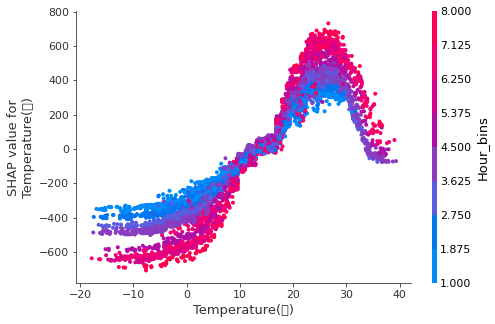

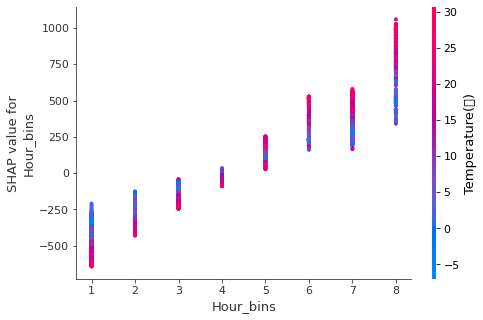

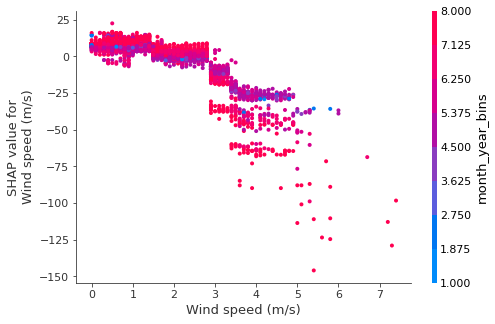

In [ ]:
for i in range(10):
  shap.dependence_plot(i, shap_values, X_train_tree)